In [190]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error as mape

Read data

In [191]:
dataset = pd.read_csv('Laptop.csv')
dataset = dataset[["PriceSale",	"Brand", "RamCapacity",	"DisplaySize", "PinCapacity",	"PinCell", "DiskSpace"]]
dataset

,PriceSale,Brand,RamCapacity,DisplaySize,PinCapacity,PinCell,DiskSpace
0,18690000.0,ACER,8.0,15.6,NaN,4.0,512.0
1,18290000.0,LENOVO,16.0,14.0,56.5,NaN,512.0
2,16390000.0,ASUS,8.0,15.6,48.0,3.0,512.0
3,13490000.0,LENOVO,8.0,14.0,NaN,3.0,1024.0
4,9990000.0,DELL,4.0,15.6,NaN,NaN,128.0
...,...,...,...,...,...,...,...
1044,16990000.0,ACER,8.0,NaN,48.0,3.0,512.0
1045,23290000.0,ASUS,8.0,NaN,67.0,4.0,512.0
1046,NaN,ACER,16.0,NaN,NaN,NaN,NaN
1047,NaN,ACER,8.0,15.6,NaN,NaN,NaN


Preprocessing Data

In [192]:
# Delete NaN data
dataset = dataset.dropna(subset=["PriceSale"])
# Xoa mau co hon 1 trưong trong
dataset["num_nan"] = dataset.isnull().apply(lambda row: row.sum(), axis=1)
dataset = dataset[dataset.num_nan <= 0]
# Encode onehot
one_hot = pd.get_dummies(dataset['Brand'])
# Drop column B as it is now encoded
dataset = dataset.drop('Brand',axis = 1)
# Join the encoded df
dataset = dataset.join(one_hot)
dataset

C:\Users\ACER\AppData\Local\Temp\ipykernel_13240\889977999.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["num_nan"] = dataset.isnull().apply(lambda row: row.sum(), axis=1)


,PriceSale,RamCapacity,DisplaySize,PinCapacity,PinCell,DiskSpace,num_nan,ACER,ASUS,DELL,FUJITSU,GIGABYTE,HP,LENOVO,LG,MSI
2,16390000.0,8.0,15.6,48.0,3.0,512.0,0,0,1,0,0,0,0,0,0,0
5,11490000.0,8.0,15.6,41.0,3.0,256.0,0,0,0,0,0,0,1,0,0,0
6,10690000.0,8.0,15.6,38.0,2.0,256.0,0,0,0,0,0,0,0,1,0,0
7,20790000.0,8.0,13.3,51.0,3.0,256.0,0,0,0,0,0,0,1,0,0,0
8,6490000.0,4.0,14.0,41.0,3.0,128.0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704,20990000.0,8.0,15.6,54.0,4.0,512.0,0,0,0,1,0,0,0,0,0,0
714,20990000.0,8.0,16.1,70.0,4.0,512.0,0,0,0,0,0,0,1,0,0,0
763,28990000.0,8.0,15.6,56.0,4.0,512.0,0,0,1,0,0,0,0,0,0,0
918,19460000.0,8.0,14.0,42.0,3.0,512.0,0,0,1,0,0,0,0,0,0,0


Split train test

In [193]:
train, test = train_test_split(dataset)
train = train.reset_index()
test = test.reset_index()

Min-Max Scaler

In [194]:
from sklearn.preprocessing import MinMaxScaler

# Nomalize
for attr in ["RamCapacity",	"DisplaySize", "PinCapacity",	"PinCell","DiskSpace"]:
    scaler = MinMaxScaler()
    scaler.fit(train[[attr]])
    train[[attr]] = scaler.transform(train[[attr]])
    test[[attr]] = scaler.transform(test[[attr]])


In [195]:
X_train = train[["RamCapacity",  "DisplaySize",  "PinCapacity",  "PinCell",  "DiskSpace",   "ACER",  "ASUS",  "DELL",  "FUJITSU",  "GIGABYTE",  "HP",  "LENOVO",  "LG",  "MSI"]]
Y_train = train[['PriceSale']]


X_test = test[["RamCapacity",  "DisplaySize",  "PinCapacity",  "PinCell",  "DiskSpace",   "ACER",  "ASUS",  "DELL",  "FUJITSU",  "GIGABYTE",  "HP",  "LENOVO",  "LG",  "MSI"]]
Y_test = test[['PriceSale']]


Linear Regression

In [196]:
from sklearn.linear_model import LinearRegression
Linaer_regressor = LinearRegression()
Linaer_regressor.fit(X_train, Y_train)

LinearRegression()

In [197]:
y_pred_linear = Linaer_regressor.predict(X_test)

print("MAPE =",mape(Y_test, y_pred_linear))


MAPE = 0.16303167209022482


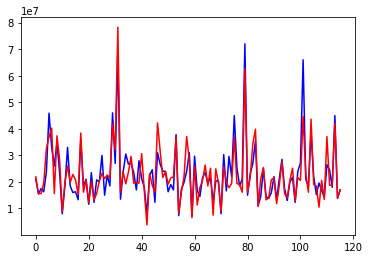

In [198]:
plt.plot( Y_test, color="blue", label="original")
plt.plot( y_pred_linear, color="red", label="predicted")
plt.show()

CNN regression

In [199]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
import matplotlib.pyplot as plt

model = Sequential()
model.add(Conv1D(128, 5, activation="relu", input_shape=(14, 1)))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(1))
model.compile(loss="mape", optimizer="adam")

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 10, 128)           768       
                                                                 
 flatten_2 (Flatten)         (None, 1280)              0         
                                                                 
 dense_4 (Dense)             (None, 64)                81984     
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 82,817
Trainable params: 82,817
Non-trainable params: 0
_________________________________________________________________


In [200]:
model.fit(X_train, Y_train,epochs=500,verbose=1,batch_size=16)

Epoch 1/500
22/22 [==============================] - 1s 2ms/step - loss: 100.0000
Epoch 2/500
22/22 [==============================] - 0s 3ms/step - loss: 100.0000
Epoch 3/500
22/22 [==============================] - 0s 3ms/step - loss: 100.0000
Epoch 4/500
22/22 [==============================] - 0s 3ms/step - loss: 100.0000
Epoch 5/500
22/22 [==============================] - 0s 2ms/step - loss: 100.0000
Epoch 6/500
22/22 [==============================] - 0s 2ms/step - loss: 99.9999
Epoch 7/500
22/22 [==============================] - 0s 3ms/step - loss: 99.9998
Epoch 8/500
22/22 [==============================] - 0s 3ms/step - loss: 99.9994
Epoch 9/500
22/22 [==============================] - 0s 2ms/step - loss: 99.9986
Epoch 10/500
22/22 [==============================] - 0s 2ms/step - loss: 99.9970
Epoch 11/500
22/22 [==============================] - 0s 5ms/step - loss: 99.9943
Epoch 12/500
22/22 [==============================] - 0s 3ms/step - loss: 99.9900
Epoch 13/500
22/22 [

In [201]:
ypred_cnn = model.predict(X_test)

print("MAPE =",mape(Y_test, ypred_cnn))

4/4 [==============================] - 0s 2ms/step
MAPE = 0.2616611490301728


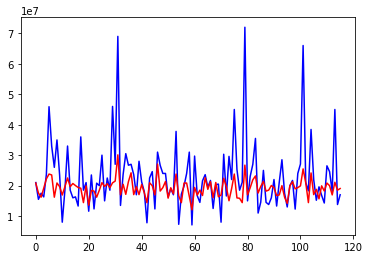

In [202]:
plt.plot( Y_test, color="blue", label="original")
plt.plot( ypred_cnn, color="red", label="predicted")
plt.show()